In this notebook, we train an MLP to classify images from MNIST database. 
All details in readme.md

In [10]:
'''
1. Load MNIST Database
'''
from keras.datasets import mnist

#use keras to import pre-shuffled MNIST database
(XTrain, yTrain), (XTest, yTest) = mnist.load_data()

print("The MNIST database has {} training set of examples.".format(len(XTrain)))
print("The MNIST databaset has {} test sample of examples".format(len(XTest)))


The MNIST database has 60000 training set of examples.
The MNIST databaset has 10000 test sample of examples


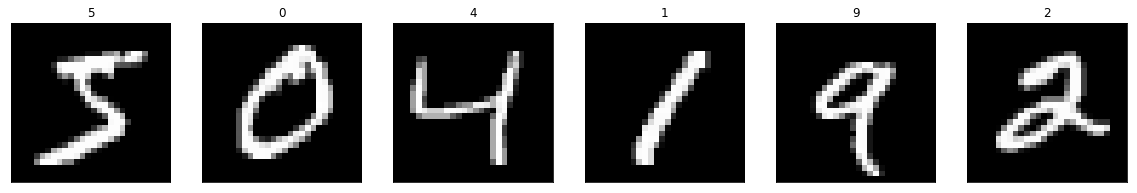

In [11]:
'''
2. Visualize the first six training images
'''
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

#plot first six images
fig = plt.figure(figsize = (20, 20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i + 1, xticks = [], yticks = [])
    ax.imshow(XTrain[i], cmap = 'gray')
    ax.set_title(str(yTrain[i]))

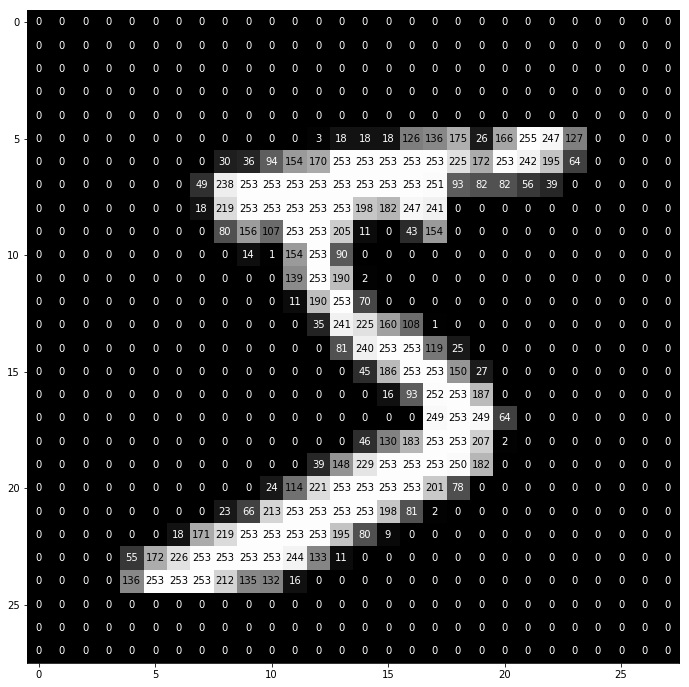

In [12]:
'''
3. View an image in more detail
'''
def visualizeInput(img, ax):
    ax.imshow(img, cmap = 'gray')
    width, height = img.shape
    threshold = img.max() / 2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y], 2)), xy = (y, x), 
                       horizontalalignment = 'center', 
                       verticalalignment = 'center', 
                       color = 'white' if img[x][y] < threshold else 'black')

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
visualizeInput(XTrain[0], ax)

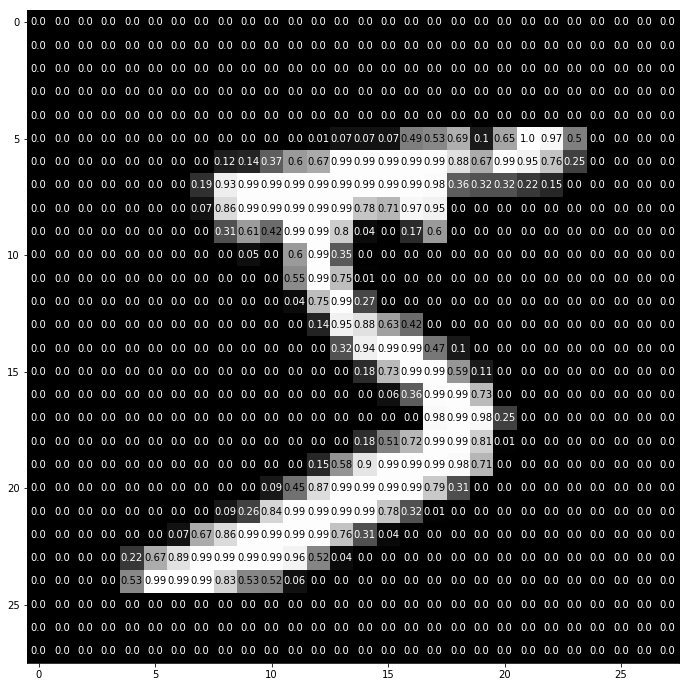

In [13]:
'''
4. Rescale the images by dividing every pixel in every image by 255
this idea is to normalize pixel
'''
#rescale [0, 255] --> [0, 1]
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255

fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
visualizeInput(XTrain[0], ax)

In [14]:
'''
5. Encode categorical integer labels using a one-hot scheme
'''
from keras.utils import np_utils

#print first ten training labels
print("integer-valued labels: ")
print(yTrain[ : 10])

#one-hot encode the labels
yTrain = np_utils.to_categorical(yTrain, 10)
yTest = np_utils.to_categorical(yTest, 10)

#print first 10 one hot label training data
print('one hot labels: ')
print(yTrain[ : 10])

integer-valued labels: 
[5 0 4 1 9 2 1 3 1 4]
one hot labels: 
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [15]:
'''
3. Define the model architecture
architecure: 785x512x512x10
'''
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

#define the model
model = Sequential()
model.add(Flatten(input_shape = XTrain.shape[1 : ]))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax')) #for output layer which is one hot encoding

#summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [16]:
'''
7. Compile the model
'''
#compile the model
model.compile(loss = 'categorical_crossentropy', optimizer = 'rmsprop', 
             metrics = ['accuracy'])


In [17]:
'''
8. Calculate the classification accuracy on the test set before training
'''
#evaluate test accuracy
score = model.evaluate(XTest, yTest, verbose = 0)
accuracy = 100 * score[1]

#print test accuracy
print('Test accuracy: {:.4f}'.format(accuracy))

Test accuracy: 10.7600


In [18]:
'''
9. Train the model
'''
from keras.callbacks import ModelCheckpoint

#train the model
checkpointer = ModelCheckpoint(filepath = 'mnist.mode.best.hdf5', 
                              verbose = 1, save_best_only = True)

hist = model.fit(XTrain, yTrain, batch_size = 128, epochs = 10, 
                validation_split = 0.2, callbacks = [checkpointer], 
                verbose = 1, shuffle = True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 17s 351us/step - loss: 0.2751 - acc: 0.9150 - val_loss: 0.1130 - val_acc: 0.9644
Epoch 2/10
48000/48000 [==============================] - 17s 361us/step - loss: 0.1123 - acc: 0.9657 - val_loss: 0.0951 - val_acc: 0.9715
Epoch 3/10
48000/48000 [==============================] - 16s 324us/step - loss: 0.0803 - acc: 0.9756 - val_loss: 0.0994 - val_acc: 0.9727
Epoch 4/10
48000/48000 [==============================] - 20s 426us/step - loss: 0.0644 - acc: 0.9799 - val_loss: 0.0973 - val_acc: 0.9757
Epoch 5/10
48000/48000 [==============================] - 24s 498us/step - loss: 0.0526 - acc: 0.9839 - val_loss: 0.0954 - val_acc: 0.9774
Epoch 6/10
48000/48000 [==============================] - 18s 381us/step - loss: 0.0438 - acc: 0.9868 - val_loss: 0.0833 - val_acc: 0.9798
Epoch 7/10
48000/48000 [==============================] - 17s 347us/step - loss: 0.0384 - acc: 0.9884 - val_loss: 0.

In [19]:
'''
10. Load the model with the best classification accuracy on the validation set
this is pre-trained model from dowloaded file mnist.model.best.hdf5
'''
model.load_weights('mnist.model.best.hdf5')

In [20]:
'''
11. Calculate the classification accuracy on the test set
'''
#evaluate test accuracy
score = model.evaluate(XTest, yTest, verbose = 0)
accuracy = 100 * score[1]

#print test accuracy
print('Test accuracy {:.4f}'.format(accuracy))

Test accuracy 98.2100
